# Project Part 1

## Introduction/Background

In this notebook, I cover the exploratory data analysis (EDA) portion of my natural language processing project,
which aims to train a deep learning model in the recognition of emotion. Through employing the _Lexicon/AFINN_
dataset, which is a list of English language words and their positive or negative intensity
from -5 (__Most Negative__) to +5 (__Most Positive__), I will examine the depth of the data provided by
the _Statements_ dataset. The _Statements_ dataset is a compiled list of English language statements,
many of which are not complete sentences, as well as the emotion that best fits them.

## Exploratory Data Analysis

* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [30]:
# EDA imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

# Unused Imports (subject to change):
# from tqdm import tqdm, tqdm_pandas
# import sklearn, gensim, wordcloud
# import textblob, spacy, textstat

In [31]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Read the datasets into Pandas DataFrame objects from CSV
statements = pd.read_csv("dataset/Statements/Data-all.csv")
lexicon = pd.read_csv("dataset/Lexicons/afinn.csv")

In [33]:
# Create a dictionary from lexicon to help accelerate computation
afinnDict = dict(zip(lexicon.word, lexicon.value))

In [34]:
# Apply a transformation that sums the lexicon's values of each word and writes it into a Pandas Series datatype
stmtAfinnValues = pd.Series(statements.Statement.apply(lambda stmt: sum([afinnDict[w] for w in stmt.split() if w in afinnDict]), 1))

In [35]:
# Insert the newly created series as a new column in the statements dataset
statements.insert(2, "Intensity", stmtAfinnValues)

#### Histograms by Statement Intensity
Reference(s):
[Seaborn.PyData.org Examples](https://seaborn.pydata.org/examples/index.html)

In [36]:
# Set Seaborn theme
sns.set_theme(style="ticks")

<AxesSubplot:xlabel='Intensity', ylabel='Count'>

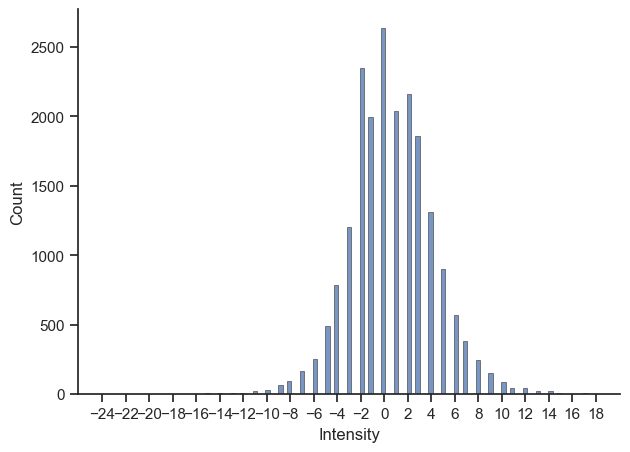

In [37]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks(range(-24, 20, 2))
sns.histplot(
    statements,
    x="Intensity",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
)

In [38]:
def regroupIntensity(x):
    if x in range(-26, -9):
        return "[-25, -10]"
    if x in range(-10, 1):
        return "[-10, 0]"
    if x in range(1, 11):
        return "[1, 10]"
    if x in range(11, 26):
        return "[11, 25]"

In [41]:
# Group statements more coarsely by intensity
grpByIntensStmts = statements
grpByIntensStmts.Intensity = grpByIntensStmts.Intensity.apply(regroupIntensity)

ValueError: arange: cannot compute length

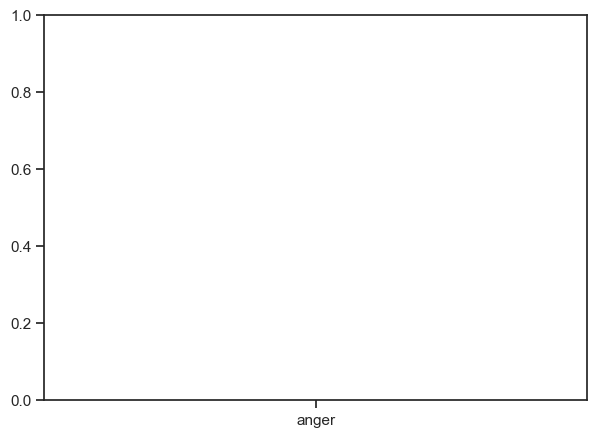

In [42]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(7, 5))

# Generate some sequential data
sns.histplot(data=grpByIntensStmts, x="Emotion", hue="Intensity", palette="mako", ax=ax1, hue_order=[regroupIntensity(x) for x in [15, 5, -5, -15]])
ax1.axhline(0, color="k", clip_on=False)